**Thinkful - Challenge 2.2.7 - Feedback Analysis**

Guided Example - For Reference (Note: total number of mislabeled points does not change when 'all caps' filter is removed)

Number of mislabeled points out of a total 5572 points : 604
Percent points mislabeled : 11.0


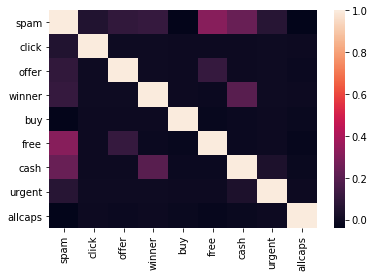

In [175]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Grab and process the raw data.
#data_path = (spam.txt)
sms_raw = pd.read_csv('spam.txt', delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(' ' + str(key) + ' ',case=False)

sms_raw['allcaps'] = sms_raw.message.str.isupper()

sms_raw['spam'] = (sms_raw['spam'] == 'spam')

sns.heatmap(sms_raw.corr())

data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
print("Percent points mislabeled : {}".format(round((target != y_pred).sum()*100/data.shape[0]),2))

**Count unique words - Using Dictionaries**

In [59]:
with open('amazon_cells_labelled.txt') as f:
    c = collections.Counter(f.read().lower().split())

print(c)

Counter({'the': 513, '1': 503, '0': 500, 'i': 313, 'and': 310, 'is': 238, 'it': 237, 'a': 217, 'this': 197, 'to': 195, 'my': 143, 'of': 119, 'for': 119, 'phone': 118, 'not': 115, 'with': 107, 'very': 102, 'was': 90, 'in': 87, 'on': 87, 'that': 75, 'have': 72, 'good': 66, 'great': 63, 'you': 62, 'but': 45, 'as': 45, 'had': 43, 'works': 43, 'so': 42, 'are': 41, 'battery': 39, 'sound': 35, 'has': 34, 'all': 34, 'one': 34, 'quality': 33, 'from': 33, 'phone.': 33, 'headset': 32, 'would': 32, 'your': 32, 'it.': 31, 'like': 30, 'if': 29, "don't": 28, "i've": 28, 'than': 28, 'product': 27, 'after': 27, 'use': 27, "it's": 27, 'be': 26, 'really': 26, 'no': 26, 'at': 24, '-': 24, 'recommend': 24, 'does': 23, 'or': 23, 'work': 23, "i'm": 22, 'get': 22, 'when': 22, 'only': 22, 'just': 21, 'up': 21, 'product.': 21, 'excellent': 21, 'love': 20, 'any': 20, 'well': 20, 'am': 20, 'out': 20, 'also': 19, '2': 19, 'nice': 19, 'an': 19, 'best': 19, 'do': 19, 'ear': 19, 'me': 19, 'can': 18, 'these': 18, 'bet

**Count words and output average review per word - Using Lists**

In [103]:
import pandas as pd
import re

df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t")
df.columns = ['Review', 'Score']
Review = df['Review']
Score = df['Score']

#Put words and scores into list
wordList = []
lineScore = []
line = []
for i in range(len(Review)):
    line = re.findall(r"[\w']+", Review[i].lower())
    for word in range(len(line)):
        wordList.append(line[word])
        lineScore.append(Score[i])
        
df2 = pd.DataFrame(list(zip(wordList, lineScore)),columns=['List','Score'])

#Create list of unique words, count frequency, and calculate average review
df3 = df2.groupby('List')['Score'].agg(['count','mean']).reset_index()
count = df3['count']
mean = df3['mean']

#Create list of unique words associated with positive reviews
PositiveWordScore = []
for i in range(len(df3['List'])):
    PositiveWordScore.append(count[i]*mean[i])

df3['Pos Word Score'] = pd.Series(PositiveWordScore, index=df3.index)
df4 = df3.sort_values('Pos Word Score', ascending=False)
df5 = df4.loc[df4['mean'] > 0.8]
print(df5.iloc[:20])

#Create list of unique words associated with negative reviews
NegativeWordScore = []
for i in range(len(df3['List'])):
    a = 1 - mean[i]
    NegativeWordScore.append(count[i]*a)

df3['Neg Word Score'] = pd.Series(NegativeWordScore, index=df3.index)
df4 = df3.sort_values('Neg Word Score', ascending=False)
df5 = df4.loc[df4['mean'] < 0.3]
print(df5.iloc[:20])

             List  count      mean  Pos Word Score
731         great     99  0.949495            94.0
725          good     77  0.831169            64.0
1854        works     47  0.978723            46.0
1805         well     42  0.833333            35.0
579     excellent     27  0.962963            26.0
1258        price     27  0.925926            25.0
1086         nice     22  1.000000            22.0
181          best     23  0.913043            21.0
980          love     20  1.000000            20.0
533          easy     18  0.833333            15.0
329   comfortable     17  0.823529            14.0
751         happy     15  0.866667            13.0
636          fine     13  0.923077            12.0
312         clear     12  0.833333            10.0
642          fits     11  0.909091            10.0
1853      working     11  0.818182             9.0
777        highly      9  0.888889             8.0
1867        years      9  0.888889             8.0
878         jabra      8  0.875

**Using positive keywords from previous step with guided example to predict score of Amazon Review**

Number of mislabeled points out of a total 999 points : 326
Percent points mislabeled : 33.0


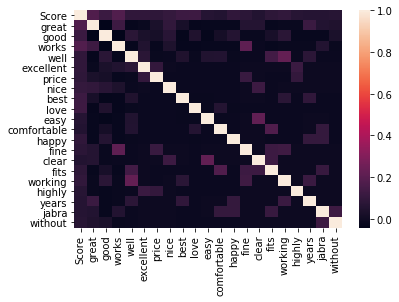

In [176]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Grab and process the raw data.
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t")
df.columns = ['Review', 'Score']
 
keywords = ['great','good','works','well','excellent','price','nice','best','love',
            'easy','comfortable','happy','fine','clear','fits','working','highly','years',
            'jabra', 'without']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    df[str(key)] = df.Review.str.contains(' ' + str(key) + ' ',case=False)

sns.heatmap(df.corr())

data = df[keywords]
target = df['Score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
print("Percent points mislabeled : {}".format(round((target != y_pred).sum()*100/data.shape[0]),2))

**Using positive keywords from previous step with guided example to predict score of Yelp Review**

Number of mislabeled points out of a total 999 points : 381
Percent points mislabeled : 38.0


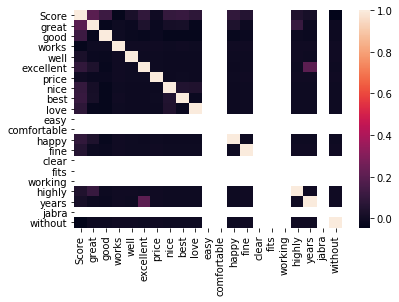

In [177]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Grab and process the raw data.
df = pd.read_csv('yelp_labelled.txt',delimiter="\t")
df.columns = ['Review', 'Score']
 
keywords = ['great','good','works','well','excellent','price','nice','best','love',
            'easy','comfortable','happy','fine','clear','fits','working','highly','years',
            'jabra', 'without']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    df[str(key)] = df.Review.str.contains(' ' + str(key) + ' ',case=False)

sns.heatmap(df.corr())

data = df[keywords]
target = df['Score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
print("Percent points mislabeled : {}".format(round((target != y_pred).sum()*100/data.shape[0]),2))

**Using positive keywords from previous step with guided example to predict score of IMDB Review**

Number of mislabeled points out of a total 747 points : 320
Percent points mislabeled : 43.0


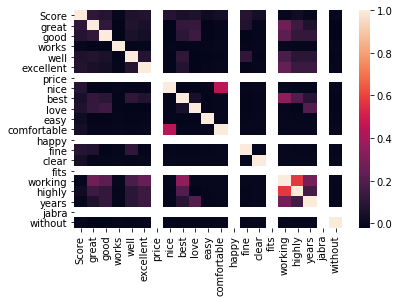

In [178]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Grab and process the raw data.
df = pd.read_csv('imdb_labelled.txt',delimiter="\t")
df.columns = ['Review', 'Score']
 
keywords = ['great','good','works','well','excellent','price','nice','best','love',
            'easy','comfortable','happy','fine','clear','fits','working','highly','years',
            'jabra', 'without']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    df[str(key)] = df.Review.str.contains(' ' + str(key) + ' ',case=False)

sns.heatmap(df.corr())

data = df[keywords]
target = df['Score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
print("Percent points mislabeled : {}".format(round((target != y_pred).sum()*100/data.shape[0]),2))